# Fetching data using Rapid-API

In [16]:
# For single API hit

import http.client
import pandas as pd
import json

conn = http.client.HTTPSConnection("drug-info-and-price-history.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "5bb9129526msh6ebad5008b99642p1b96a5jsn57c6c7d75954",
    'x-rapidapi-host': "drug-info-and-price-history.p.rapidapi.com"
}

conn.request("GET", "/1/druginfo?drug=advil", headers=headers)

res = conn.getresponse()
data = res.read()
json_data = json.loads(data.decode('utf-8'))

df = pd.DataFrame(json_data)
df.head()

,product_ndc,generic_name,labeler_name,brand_name,active_ingredients,finished,packaging,listing_expiration_date,openfda,marketing_category,dosage_form,spl_id,product_type,route,marketing_start_date,product_id,application_number,brand_name_base,pharm_class
0,0573-0164,diphenhydramine citrate and ibuprofen,Haleon US Holdings LLC,ADVIL PM,"[{'name': 'DIPHENHYDRAMINE CITRATE', 'strength...",True,"[{'package_ndc': '0573-0164-04', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,"TABLET, COATED",15971707-84cd-4742-e063-6394a90af906,HUMAN OTC DRUG,[ORAL],20051221,0573-0164_15971707-84cd-4742-e063-6394a90af906,NDA021394,ADVIL PM,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."


In [19]:
# For multiple API hit in a fro loop

import http.client
import pandas as pd
import json
import time

# Create empty DataFrame
df = pd.DataFrame()

# Set up API connection and headers
conn = http.client.HTTPSConnection("drug-info-and-price-history.p.rapidapi.com")
headers = {
    'x-rapidapi-key': "5bb9129526msh6ebad5008b99642p1b96a5jsn57c6c7d75954",
    'x-rapidapi-host': "drug-info-and-price-history.p.rapidapi.com"
}

for i in range(200):
    conn.request("GET", "/1/druginfo?drug=advil", headers=headers)  # sends an http get request to API
    res = conn.getresponse()  # gets the server's response to the GET request
    data = res.read()  # reeads the raw response body( in bytes )
    response = json.loads(data.decode("utf-8"))  # data.decode('utf-8') - converts bytes to strings  json.loads() - parses the json string into python object(dict or list)
    if  isinstance(response, list):  # if response is in list, convert it directly to a DataFrame
      temp_df = pd.DataFrame(response)
    else:  # if it's in a single record, then wrap it in a list before converting, so it works with a DataFrame
      temp_df = pd.DataFrame([response])
    df = pd.concat([df, temp_df], ignore_index=True)  # appends temp_df to main DataFrame df
df.head(5)

,product_ndc,generic_name,labeler_name,brand_name,active_ingredients,finished,packaging,listing_expiration_date,openfda,marketing_category,dosage_form,spl_id,product_type,route,marketing_start_date,product_id,application_number,brand_name_base,pharm_class
0,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
1,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
2,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
3,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
4,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."


In [20]:
df.head(20)

,product_ndc,generic_name,labeler_name,brand_name,active_ingredients,finished,packaging,listing_expiration_date,openfda,marketing_category,dosage_form,spl_id,product_type,route,marketing_start_date,product_id,application_number,brand_name_base,pharm_class
0,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
1,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
2,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
3,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
4,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
5,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
6,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
7,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
8,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,8897

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   product_ndc              200 non-null    object
 1   generic_name             200 non-null    object
 2   labeler_name             200 non-null    object
 3   brand_name               200 non-null    object
 4   active_ingredients       200 non-null    object
 5   finished                 200 non-null    bool  
 6   packaging                200 non-null    object
 7   listing_expiration_date  200 non-null    object
 8   openfda                  200 non-null    object
 9   marketing_category       200 non-null    object
 10  dosage_form              200 non-null    object
 11  spl_id                   200 non-null    object
 12  product_type             200 non-null    object
 13  route                    200 non-null    object
 14  marketing_start_date     200 non-null    o

In [24]:
df.describe()

,product_ndc,generic_name,labeler_name,brand_name,active_ingredients,finished,packaging,listing_expiration_date,openfda,marketing_category,dosage_form,spl_id,product_type,route,marketing_start_date,product_id,application_number,brand_name_base,pharm_class
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,0573-0232,ibuprofen,Haleon US Holdings LLC,CHILDRENS ADVIL,"[{'name': 'IBUPROFEN', 'strength': '100 mg/5mL'}]",True,"[{'package_ndc': '0573-0232-30', 'description'...",20251231,{'manufacturer_name': ['Haleon US Holdings LLC...,NDA,SUSPENSION,88972802-d04c-4fe3-8c56-3c3d1e3b4218,HUMAN OTC DRUG,[ORAL],20131220,0573-0232_88972802-d04c-4fe3-8c56-3c3d1e3b4218,NDA020589,CHILDRENS ADVIL,"[Anti-Inflammatory Agents, Non-Steroidal [CS],..."
freq,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200


In [25]:
df.isnull()

,product_ndc,generic_name,labeler_name,brand_name,active_ingredients,finished,packaging,listing_expiration_date,openfda,marketing_category,dosage_form,spl_id,product_type,route,marketing_start_date,product_id,application_number,brand_name_base,pharm_class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.shape

(200, 19)

In [27]:
import matplotlib.pyplot as plt

In [28]:
df.columns


Index(['product_ndc', 'generic_name', 'labeler_name', 'brand_name',
       'active_ingredients', 'finished', 'packaging',
       'listing_expiration_date', 'openfda', 'marketing_category',
       'dosage_form', 'spl_id', 'product_type', 'route',
       'marketing_start_date', 'product_id', 'application_number',
       'brand_name_base', 'pharm_class'],
      dtype='object')

In [41]:
# Count top 10 dosage_forms and plot

top_dosage = df['dosage_form'].value_counts().head(10)
top_dosage

,count
dosage_form,
SUSPENSION,200


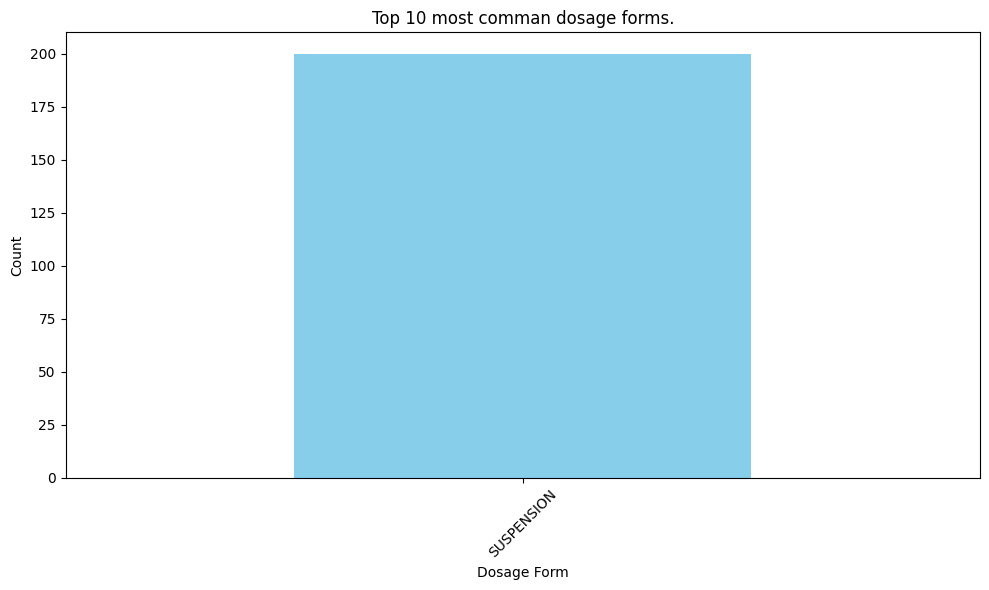

In [42]:
plt.figure(figsize=(10,6))
top_dosage.plot(kind='bar', color='skyblue')
plt.title("Top 10 most comman dosage forms.")
plt.xlabel('Dosage Form')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# Count of products by route and plot

top_routes = df['route'].value_counts().head(10)
top_routes

,count
route,
[ORAL],200


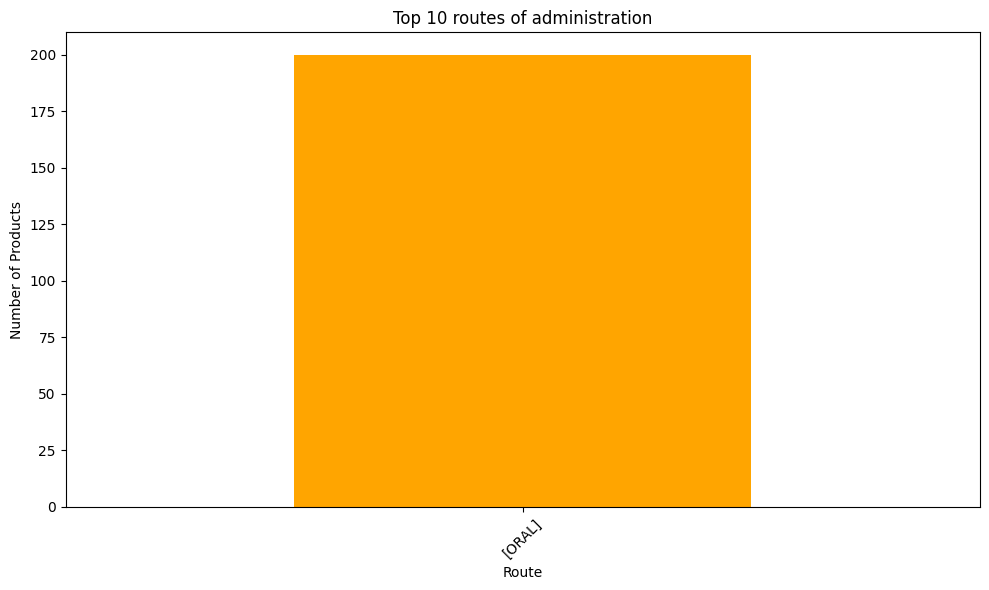

In [51]:
plt.figure(figsize=(10,6))
top_routes.plot(kind='bar', color='orange')
plt.title('Top 10 routes of administration')
plt.xlabel('Route')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Marketing Category Distribution and plot

marketing_dist = df['marketing_category'].value_counts().head(10)
marketing_dist

,count
marketing_category,
NDA,200


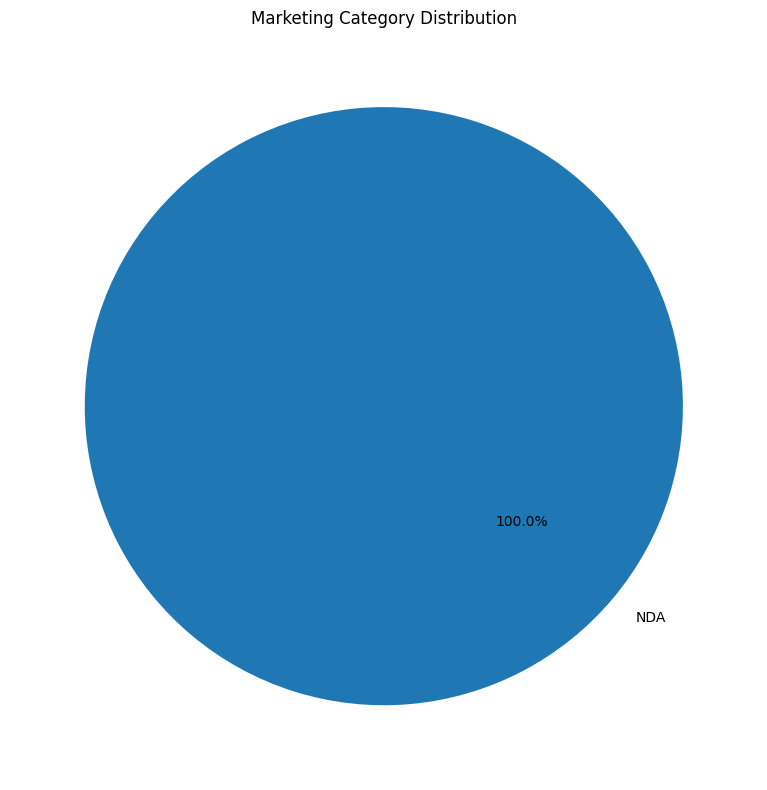

In [56]:
plt.figure(figsize=(8,8))
plt.title('Marketing Category Distribution')
marketing_dist.plot(kind='pie',autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.tight_layout()
plt.show()

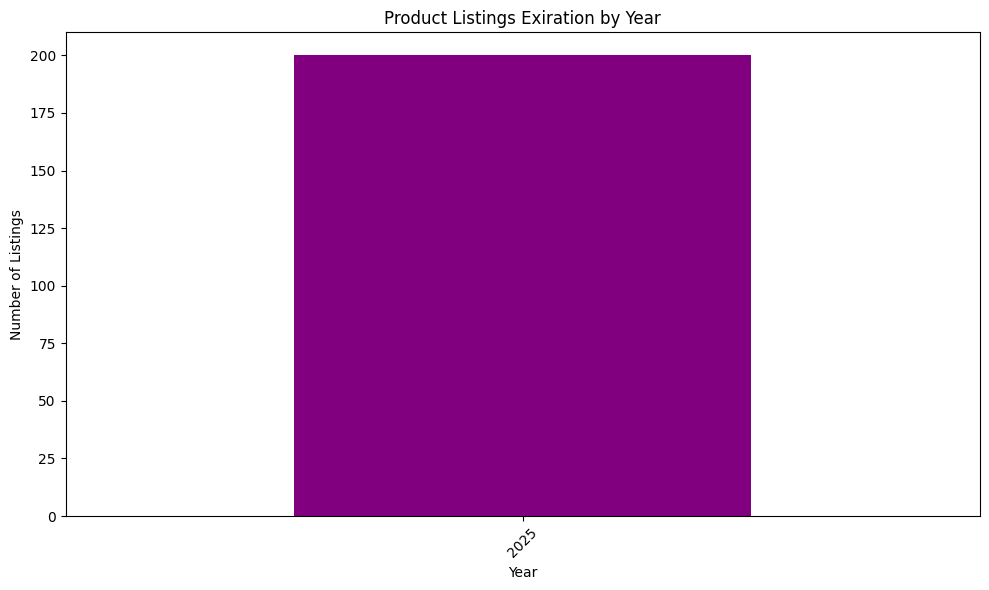

In [61]:
# Convert date column to datetime
df['listing_expiration_date'] = pd.to_datetime(df['listing_expiration_date'], errors='coerce')

# Drop NaT values and extract year
df = df.dropna(subset=['listing_expiration_date'])

#Plotting
plt.figure(figsize=(10,6))
df['expiration_year'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Product Listings Exiration by Year')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()